## Bayesian Sequential Testing - ROPE Decision Rule
## Introduction

In this document, we outline the ROPE decision rule and its implementation based on the paper [Bayesian Estimation Supersedes the t-Test](https://cran.r-project.org/web/packages/BEST/vignettes/BEST.pdf). In order to understand this decision rule we need to define the concepts of 95% HDI(High Posterior Density Interval) and ROPE(Region of Practical Equivalence).

Let $\mu_A$ represent the posterior distribution of the conversion rate of variant A and $\mu_B$ represent the posterior distribution of the conversion rate of variant B. $\mu_B - \mu_A$ represents the posterior distribution of the lift(treatment effect) of variant B over variant A. 95% HDI is defined as the shortest interval covering 95% posterior density of $\mu_B - \mu_A$. ROPE is an interval with 0 as its center and defined based on the minimum detectable effect(MDE) specified prior to the start of a test. The ROPE decision rule uses 95% HDI and ROPE jointly to decide test outcomes. This decision rule is illustrated by the following 4 scenarios. 

The cyan bars represent the posterior distributions of $\mu_B - \mu_A$. The two vertical blue broken lines define the ROPE and the green vertical represents the center of the ROPE(which equals to 0).

In case (a), the 95% HDI is completely outside of the ROPE, on the right hand side of the ROPE.
The test is considered conclusive and variant B is declared as the winner.  

In case (b), the 95% HDI is completely outside of the ROPE, on the left hand side of the ROPE.
The test is considered conclusive and variant A is declared as the winner.  

In case (c), the 95% HDI is completely inside the ROPE. 
The test is considered conclusive and variants A and B are considered to be effectively equivalent.  

In case (d), the 95% HDI overlaps with the ROPE and the test is considered inconclusive. 

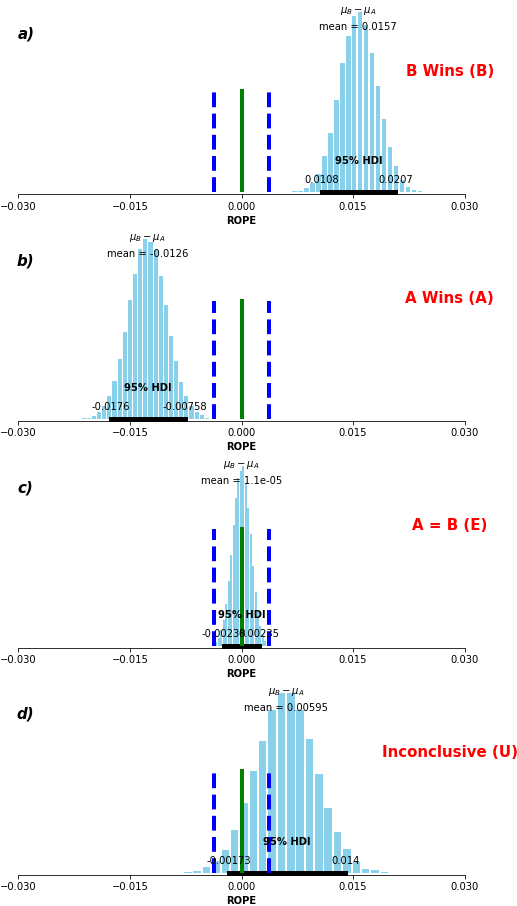

In [12]:
from IPython.display import Image
Image('rope.png')

## An example of generating the ROPE decision outcome for a given conversion data input.

In [10]:
import util.rope_core as rope_core
rope_core.calc_stat(sa=250, na=11221, sb=1600, nb=14187, relative_mde_value=0.02)

{'cvr_data': [250, 11221, 1600, 14187],
 'beta_params': [251, 10972, 1601, 12588],
 'cvr_a': 0.022363868597387877,
 'cvr_b': 0.11283663571597106,
 'prob_b_gt_a': 1.0,
 'lift': 0.09047276711858318,
 'rope_hdi_ratio': 0.6,
 'rope_mde_ratio': 0.375,
 'min_rope_half_width': 0.0001677290144804091,
 'rope': (-0.0035309294739408453, 0.0035309294739408453),
 'rope_width': 0.0070618589478816905,
 'lift_hdi': (0.0845893865930207, 0.09635915150615686),
 'lift_hdi_width': 0.011769764913136152,
 'rope_res': 'B'}

## Simulation
Below we use simulation to demonstrate the properties of the ROPE decision rule. We will focus on scenarios where the baseline conversion rate = $0.2$ and $mde = 0.02$. Compare its outcome against that of the fixed sample size t-test. The following sample size calculation tells us if we run a A/B test and collect 261,830 data points for each variant, then t-test will guarantee that type 1 error rate = 5% and type 2 error rate = 5%(or power = 95%) for $mde=0.02$.

In [7]:
import numpy as np
import util.helper as helper
ss = helper.sample_size(mu=0.2, mde_value=0.02, relative_mde=True, pr=True) 

Sample size for mu=0.2000, relative_mde_value=0.0200, absolute_mde_value=0.0040, alpha=0.0500, beta=0.0500:
variant_sample_size=261,830, total_sample_size=523,661


### Scenario 1:  $p_A = 0.2, p_B = 0.2, mde=0.02$
Type 1 error rate is under 5% after 25 peeks.

In [8]:
import util.sim_rope as sim_rope
np.random.seed(2016)
sim_data = sim_rope.sim_peeking(muA=0.20, muB=0.20, sample_size=ss['variant_sample_size'], 
                                n_experiments=1000, n_peeks=25, relative_mde_value=0.02, rvs_size=10000)

[Start time]: 2019-10-21 13:20:01
[Parameters]: muA: 0.2, muB: 0.2, sample_size: 261,830, n_experiments: 1,000, relative_mde_value: 0.02, rope_hdi_ratio: 0.60, rope_mde_ratio: 0.375, min_rope_half_width: 0.00150, n_peeks: 25, start: 10,473, step: 10,473, rvs_size: 10,000
[10-21 13:20:16]: Peek #1 @ 10,473 samples, avg_hdi_width: 0.02159, avg_rope_width: 0.01296, avg_lift: 0.01941, rope_res: {'U': 997, 'A': 2, 'B': 1}
[10-21 13:20:19]: Peek #2 @ 20,946 samples, avg_hdi_width: 0.01527, avg_rope_width: 0.00916, avg_lift: nan, rope_res: {'U': 997, 'A': 2, 'B': 1}
[10-21 13:20:22]: Peek #3 @ 31,419 samples, avg_hdi_width: 0.01247, avg_rope_width: 0.00748, avg_lift: 0.01016, rope_res: {'U': 995, 'A': 3, 'B': 2}
[10-21 13:20:24]: Peek #4 @ 41,892 samples, avg_hdi_width: 0.01080, avg_rope_width: 0.00648, avg_lift: nan, rope_res: {'U': 995, 'A': 3, 'B': 2}
[10-21 13:20:27]: Peek #5 @ 52,365 samples, avg_hdi_width: 0.00966, avg_rope_width: 0.00580, avg_lift: 0.00832, rope_res: {'U': 993, 'B': 4,

### Scenario 2:  $p_A = 0.2, p_B = 0.21, mde = 0.02$
The ROPE decision rule needs an average sample size of 216,000 to get 95% power compared to 261,000 sample size needed for T-test.

In [9]:
import util.sim_rope as sim_rope
np.random.seed(2016)
sim_data = sim_rope.sim_peeking(muA=0.20, muB=0.204, sample_size=int(ss['variant_sample_size']*2.285), 
                                n_experiments=1000, n_peeks=25, relative_mde_value=0.02, rvs_size=10000)

[Start time]: 2019-10-21 13:21:22
[Parameters]: muA: 0.2, muB: 0.204, sample_size: 598,281, n_experiments: 1,000, relative_mde_value: 0.02, rope_hdi_ratio: 0.60, rope_mde_ratio: 0.375, min_rope_half_width: 0.00150, n_peeks: 25, start: 23,931, step: 23,931, rvs_size: 10,000
[10-21 13:21:54]: Peek #1 @ 23,931 samples, avg_hdi_width: 0.01434, avg_rope_width: 0.00860, avg_lift: 0.01240, rope_res: {'U': 975, 'B': 25}
[10-21 13:21:57]: Peek #2 @ 47,862 samples, avg_hdi_width: 0.01014, avg_rope_width: 0.00609, avg_lift: 0.00905, rope_res: {'U': 942, 'B': 58}
[10-21 13:21:59]: Peek #3 @ 71,793 samples, avg_hdi_width: 0.00828, avg_rope_width: 0.00497, avg_lift: 0.00762, rope_res: {'U': 871, 'B': 129}
[10-21 13:22:02]: Peek #4 @ 95,724 samples, avg_hdi_width: 0.00717, avg_rope_width: 0.00430, avg_lift: 0.00630, rope_res: {'U': 796, 'B': 204}
[10-21 13:22:04]: Peek #5 @ 119,655 samples, avg_hdi_width: 0.00642, avg_rope_width: 0.00385, avg_lift: 0.00560, rope_res: {'U': 709, 'B': 291}
[10-21 13:22